In [1]:
%pylab inline

import matplotlib.pyplot as plt

import numpy as np

import matplotlib as mpl

import scipy.optimize as opt

Populating the interactive namespace from numpy and matplotlib


In [2]:
from gibbs import BiddleFreeEn

In [3]:
bid = BiddleFreeEn()

In [4]:
# %%timeit
n = 1000
temps = np.linspace(300, 1000, n)
presses = np.linspace(1, 1000, n)

#That,Phat = bid.convert_TP()


x = bid.x(temps,presses)

In [5]:
x = bid.x(temps,presses)


In [6]:
# for i in x:
#     for j in i:
#         if j != 0:
#             print(j)

In [7]:
# %%timeit
Ts = 300
Ps = 1

Ts = np.asarray(Ts)
if Ts.shape == ():
    Ts = [Ts]
Ps = np.asarray(Ps)
if Ps.shape == ():
    Ps = [Ps]



x_single = bid.x(300,1)

In [8]:


from mpl_toolkits import mplot3d





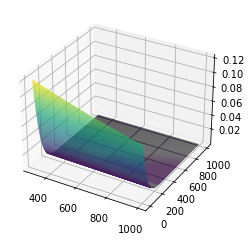

In [9]:
#%matplotlib widget

fig = plt.figure()
ax = plt.axes(projection='3d')

T, P = np.meshgrid(temps, presses)

ax.plot_surface(T, P, x, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')

plt.show()

In [10]:
mixer = bid.mixer




In [11]:
i, j = np.random.randint(0, 1000), np.random.randint(0, 1000)

np.add(mixer.bmixer.omega,mixer.bmixer.G_BA).shape
mixer.bmixer.omega.shape

(1, 1)

In [12]:
presses = np.linspace(1, 1500, 1000)
temps = np.linspace(300, 500, 1000)

target  = lambda x : mixer.energy_x_grad(bid.convert_T(temps),bid.convert_P(presses),x)


target2 = lambda x,P :mixer.energy_x_grad(bid.convert_T(temps),P,x) 
def target3(x, T,P): 
    return float(mixer.energy_x_grad(T, P, x))


#target2(np.linspace(0.1,0.9),300).shape


In [13]:
target(0.5).shape

(1000, 1000)

In [14]:
#sol = opt.root(target2,0.5,args=np.array([bid.convert_P(presses[0])]))

import scipy.optimize as opt 

#sol = opt.root(target,0.5)

sols = []
for p in bid.convert_P(presses):
    for t in bid.convert_T(temps):
        #print(target3(0.5,t,p).shape)
        #targ = lambda x : target2(x,p).flatten()
        #print(targ(0.5).flatten().shape)
        sol = opt.root(target3, 0.5,args = (t,p))



    #sol = opt.root(target2, 0.5, args=(p))
        sols.append(sol)


In [15]:
## todo, the optimum value of x always seems to be greater than 0






rho = bid.rho(300,presses).T


In [16]:
V = bid.vol(300,presses).T
rho = bid.rho(300, presses).T
alpha = bid.alpha(temps,presses).T



In [46]:
bid.gibbs_A.poly.coef

array([[ 0.00000e+00,  0.00000e+00, -2.61876e-03,  6.05678e-04],
       [ 0.00000e+00,  2.57249e-01,  2.48091e-02, -9.94166e-04],
       [-6.30589e+00, -4.00033e-02, -8.40543e-03,  0.00000e+00],
       [ 2.18819e+00,  7.19058e-02,  0.00000e+00,  0.00000e+00],
       [-2.56674e-01,  0.00000e+00,  0.00000e+00,  0.00000e+00]])

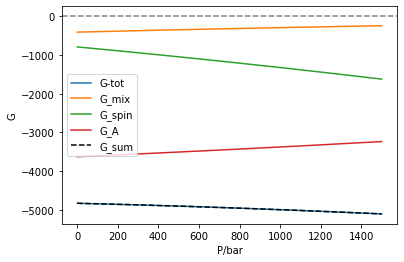

(1000, 1) (1000,)
(1000, 1)


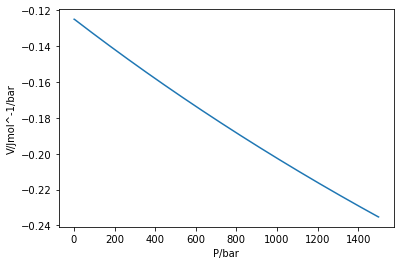

In [17]:
# plt.plot(presses,rho)
That,Phat = bid.convert_TP(300,presses)

G_conv = bid.R*bid.Tc

G = bid.energy(300,presses).T
G_mix = G_conv*bid.mixer.energy(That,Phat).T
G_spin = G_conv*bid.spinner.energy(That,Phat).T
G_A = G_conv*bid.gibbs_A.energy(That,Phat).T.reshape(G_spin.shape)

plt.plot(presses,G,label='G-tot')
plt.plot(presses,G_mix,label='G_mix')
plt.plot(presses,G_spin,label='G_spin')
plt.plot(presses,G_A,label='G_A')
plt.plot(presses,G_A+G_spin+G_mix,'k--',label='G_sum')
plt.xlabel('P/bar')
plt.ylabel('G')
plt.axhline(0,ls='--',c='grey')
plt.legend()
plt.show()
print(G.shape,presses.shape)
V_mol = np.gradient(G,presses,axis=0)

print(V_mol.shape)

plt.plot(presses,V_mol)

plt.xlabel('P/bar')
plt.ylabel('V/Jmol^-1/bar')
plt.show()

In [18]:
(G_mix+G_spin+G_A).shape

G_A.shape

(1000, 1)

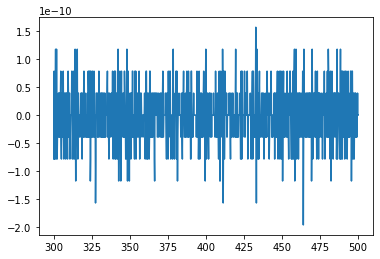

In [19]:
plt.plot(temps,alpha[0])

In [20]:
print(bid.Pc)

1700


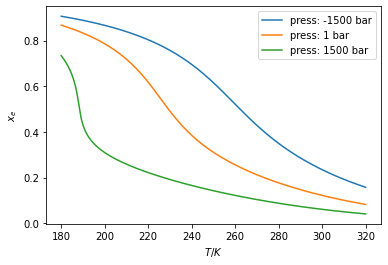

In [21]:

temps_x_test = np.linspace(180,320,1000)

for press in np.array([ -1500,1,1500]):
    xs_opt = bid.x(temps_x_test,np.array([press]))
    temps_x_test.shape
    plt.plot(temps_x_test,xs_opt,label=f'press: {press} bar')

plt.ylabel('$x_e$')
plt.xlabel('$T/K$')
plt.legend()

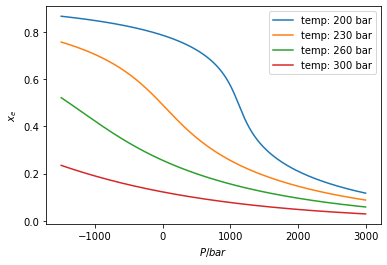

In [22]:

presses_x_test = np.linspace(-150,300,1000)*10 # *10 to convert to bar, from mpa    

for temp in np.array([200,230,260,300,]):
    xs_opt = bid.x(np.array([temp]),presses_x_test,)
    temps_x_test.shape
    plt.plot(presses_x_test,xs_opt.T,label=f'temp: {temp} bar')

plt.ylabel('$x_e$')
plt.xlabel('$P/bar$')
plt.legend()

[[1.e-07]]
[[0.86742549]]
[[0.78600416]]
[[0.1220627]]
[[0.0825063]]
[[1.e-07]]


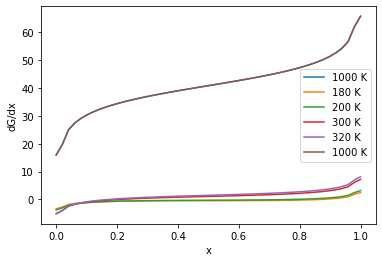

In [23]:
## Plotting the sub options


Tc = bid.Tc
Pc = bid.Pc

Ts = [1000,180,200,300,320,1000]
Ps = [-1500,1,1500]
x = np.linspace(1e-7,1-1e-7)
T = Ts[-1]
P = Ps[1]
for T in Ts:
    mix_E = bid.mixer.energy_free_x(T/Tc,P/Pc,x)
    
    #plt.plot(x,mix_E.T,label=f'{T} K')
    plt.plot(x,np.gradient(mix_E,x,axis =-1).T, label=f'{T} K')

    print(bid.mixer.x_equib(T/Tc,P/Pc))
plt.xlabel('x')
plt.ylabel('dG/dx')
legend()

[[0.86742549]]
[[0.78600416]]
[[0.1220627]]
[[0.0825063]]


/home/aidan/my_gits/ts_eos/gibbs.py:75: RuntimeWarning: divide by zero encountered in log
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:75: RuntimeWarning: invalid value encountered in multiply
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:75: RuntimeWarning: divide by zero encountered in log
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:75: RuntimeWarning: invalid value encountered in multiply
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:75: RuntimeWarning: divide by zero encountered in log
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:75: RuntimeWarning: invalid value encountered in multiply
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:75: RuntimeWarning: divide by zero encountered in log
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:75: RuntimeWarning: invalid value encounte

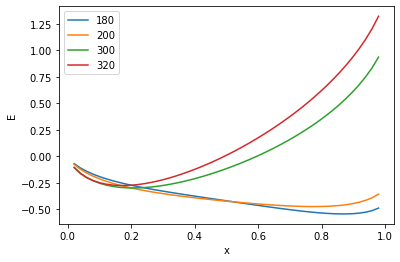

In [24]:
## Plotting the sub options


Tc = bid.Tc
Pc = bid.Pc

Ts = [180,200,300,320]
Ps = [-1500,1,1500]
x = np.linspace(0,1)
T = Ts[-1]
P = Ps[1]
for T in Ts:
    mix_E = bid.mixer.energy_free_x(T/Tc,P/Pc,x)

    plt.plot(x,mix_E.T,label=f'{T}')
    print(bid.mixer.x_equib(T/Tc,P/Pc))
plt.xlabel('x')
plt.ylabel('E')
legend()

In [25]:
min_func = lambda x: float(bid.mixer.energy_free_x(T/Tc,P/Pc,x))

In [26]:
opt.minimize_scalar(min_func,bounds=(0,1),method='bounded')

     fun: -0.2749580650015262
 message: 'Solution found.'
    nfev: 12
  status: 0
 success: True
       x: 0.1723479042119565

/home/aidan/my_gits/ts_eos/gibbs.py:75: RuntimeWarning: divide by zero encountered in log
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:75: RuntimeWarning: invalid value encountered in double_scalars
  B = (x*np.log(x) + (1-x)*np.log(1-x))


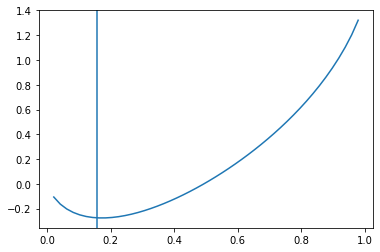

In [27]:
plt.plot(x,[min_func(xi) for xi in x])
plt.axvline(0.15637305536341858)

1.9894641071082868 1.9894641071082866


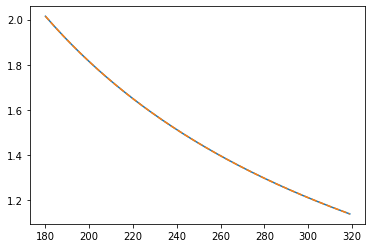

In [28]:
temps = np.arange(180,320)

temps_hat = bid.convert_T(temps)
presses_hat = bid.convert_P(np.array([-1500,1,1500]))

del_presses = presses_hat - bid.convert_P(bid.Pc)

press_i =2


omega_T = bid.mixer.omega_func(temps_hat,presses_hat[press_i])

omega_check = lambda T,delP: (2+0.03*delP)/T 
#bid_omega = bid.mixer.omega_func(temps_hat,presses_hat[press_i])

print(bid.mixer.Pc_hat,bid.convert_P(bid.Pc))

plot(temps_hat*bid.Tc, bid.mixer.omega_func(temps_hat, del_presses[press_i]))
#plot(temps,bid_omega)
plot(temps,omega_check(temps_hat,del_presses[press_i]),ls='--')


In [29]:
print(omega_check(1,2),bid.mixer.omega_func(1,2))

2.06 [[2.06]]


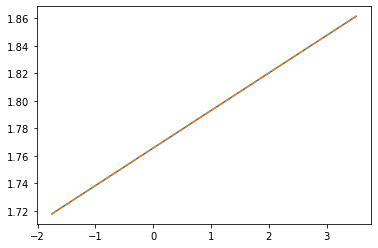

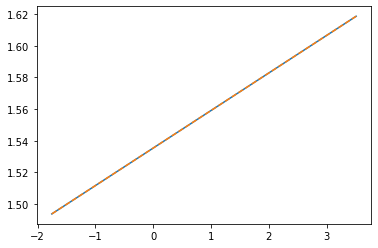

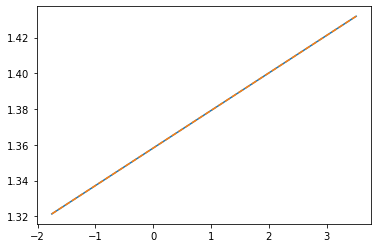

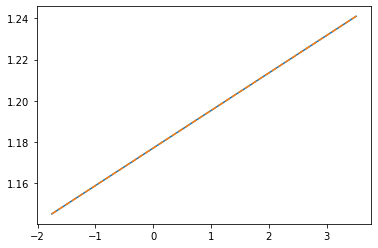

In [30]:
temps = np.array([200,230,260,300])   #np.arange(180,320)
presses = np.linspace(-1500,3000)
temps_hat = bid.convert_T(temps)
presses_hat = bid.convert_P(presses)

del_presses = presses_hat - bid.convert_P(bid.Pc)
for temp_hat in temps_hat:
    omega_P = bid.mixer.omega_func(temp_hat,del_presses)
    omega_check = lambda T,delP: (2+0.03*delP)/T 

    plot(presses_hat,omega_P.T,label=f'{temp}')

    plot(presses_hat,omega_check(temp_hat,del_presses),ls='--',label=f'{temp}')

    plt.show()

### Mixing only

In [31]:
from gibbs import GenericMixingGibbs, FinalMixingGibbs
from gibbs import biddle_params
from poly2d import Poly2D
from scipy.constants import gas_constant


In [32]:

coef_GAB = biddle_params['coef_GAB']
omega_0 = biddle_params['omega_0']
gas_constant


8.314462618

In [33]:
poly_AB = Poly2D(coef_GAB)

In [34]:
print(biddle_params['Pc'])
Tc = biddle_params['Tc']

Pc_red = biddle_params['Pc']*1e5/bid.rhoc_mol_m3/gas_constant/Tc
rhoc = bid.rhoc_mol_m3 ###biddle_params['rhoc']


omega_func = lambda T,delP : (2+omega_0*delP)/T



gen_mixer = GenericMixingGibbs(poly_AB,omega_func,Pc_red)

mixer  = FinalMixingGibbs(coef_GAB,omega_0,Pc_red)

bid_mixer = bid.mixer

1700


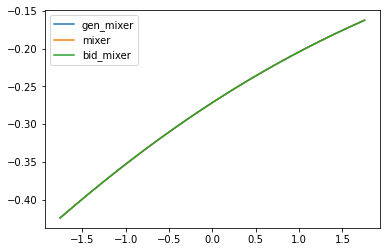

In [35]:
T = 300/biddle_params['Tc']
P = np.linspace(-1500,1500,300)*1e5/rhoc/gas_constant/Tc


plt.plot(P,gen_mixer.energy(T,P).T,label='gen_mixer')
plt.plot(P, mixer.energy(T, P).T, label='mixer')
plt.plot(P, bid_mixer.energy(T, P).T,label='bid_mixer')

plt.legend()

In [36]:
bid_mixer.Pc_hat

1.9894641071082868

In [37]:
mixer.Pc_hat

1.9894641071082868

/home/aidan/my_gits/ts_eos/gibbs.py:75: RuntimeWarning: divide by zero encountered in log
  B = (x*np.log(x) + (1-x)*np.log(1-x))
/home/aidan/my_gits/ts_eos/gibbs.py:75: RuntimeWarning: invalid value encountered in multiply
  B = (x*np.log(x) + (1-x)*np.log(1-x))


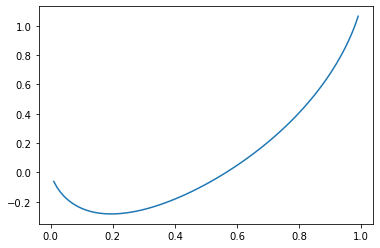

In [38]:
x= np.linspace(0,1,100)

Phat = 1e5/rhoc/gas_constant

en = bid_mixer.energy_free_x(T,Phat,x)


plot(x,en.T)

In [39]:




bid_mixer.x_equib(T,Phat)

array([[0.11247776]])

In [40]:
mixer.x_equib(T,Phat)

array([[0.11247776]])

In [41]:
Phat

0.2129896867610048

In [42]:
spin = bid.spinner


In [43]:
Ts = bid.convert_T(np.linspace(200,300,42))
Ps = bid.convert_P(np.linspace(1,100,69))


delT = Ts - 1
polyP = spin.polyPs(delT)
P = Ps

A = spin.polyA(delT)

P_ghost = np.ones(Ps.shape)
T_ghost = np.ones(Ts.shape)


B = np.outer(T_ghost,Ps)-np.outer(polyP,P_ghost)
B.shape

res = (B.T**1.5*A).T
#spin.energy(Ts, Ps)


In [44]:
delT = Ts[0]-1
print(spin.polyA(delT) *(Ps[0] - spin.polyPs(delT))**1.5)
print(res[0,0])
print(spin.energy(Ts[0],Ps[0]))

-0.679207695293073
-0.679207695293073
[[-0.6792077]]
